# **HEMA DARSHINI R - 22MIS0123**

In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=11b05c49de7739d85eccf8cfa34b1af6f2c92bc230a30286eb99c521ebc8bd60
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Initial state of qubit 0:


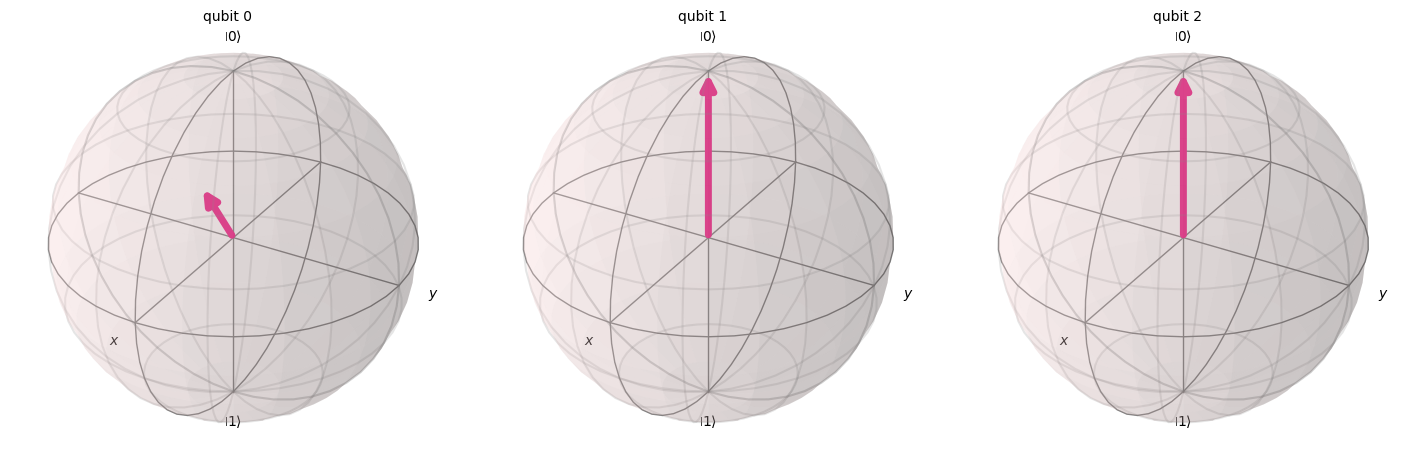

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


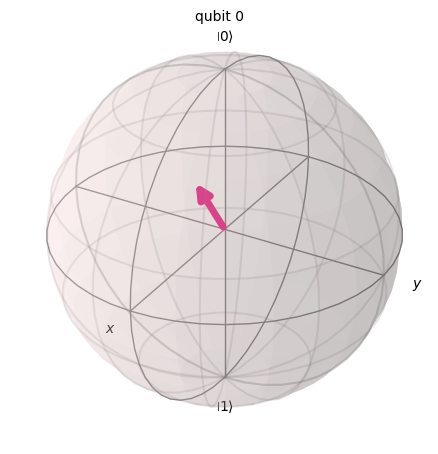

In [2]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize Bloch spheres (fixed)
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

# **Task 1: Custom State Teleportation**

In [4]:
!pip install qiskit qiskit-aer


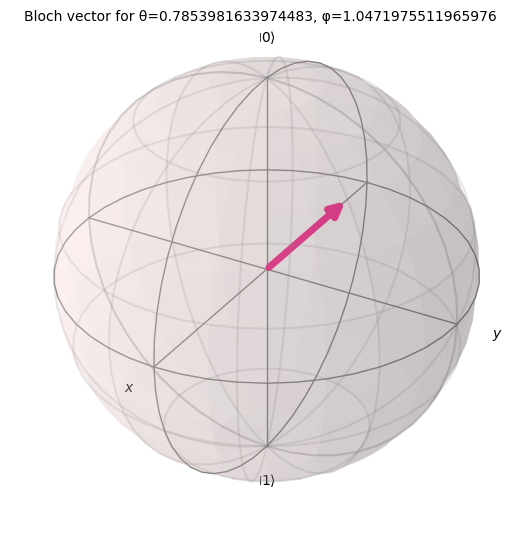

In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_vector
from math import pi, sin, cos
import numpy as np

# Custom input state
theta = pi/4  # try pi/2, pi/3, etc.
phi = pi/3

qc = QuantumCircuit(1)
qc.ry(theta, 0)
qc.rz(phi, 0)
qc.draw('mpl')

# Calculate Bloch vector manually
bloch_vector = [sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
plot_bloch_vector(bloch_vector, title=f"Bloch vector for θ={theta}, φ={phi}")


# **Task 2: Add Classical Measurement and Conditional Corrections**

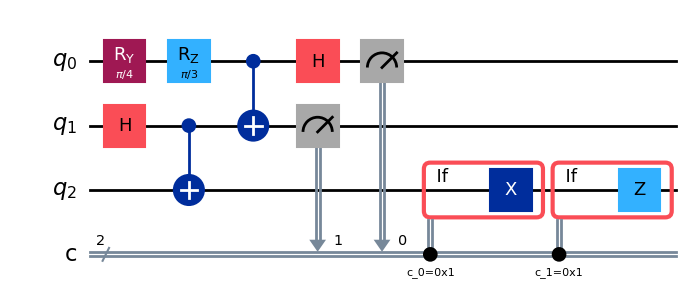

In [8]:
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(3, 2)

# 1️⃣ Prepare custom input state
theta, phi = pi/4, pi/3
qc.ry(theta, 0)
qc.rz(phi, 0)

# 2️⃣ Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# 3️⃣ Bell measurement
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# 4️⃣ Conditional corrections using if_test()
with qc.if_test((qc.clbits[0], 1)):   # if classical bit 0 == 1
    qc.x(2)

with qc.if_test((qc.clbits[1], 1)):   # if classical bit 1 == 1
    qc.z(2)

qc.draw("mpl")


# **Task 3 – Fidelity Analysis for Random States**

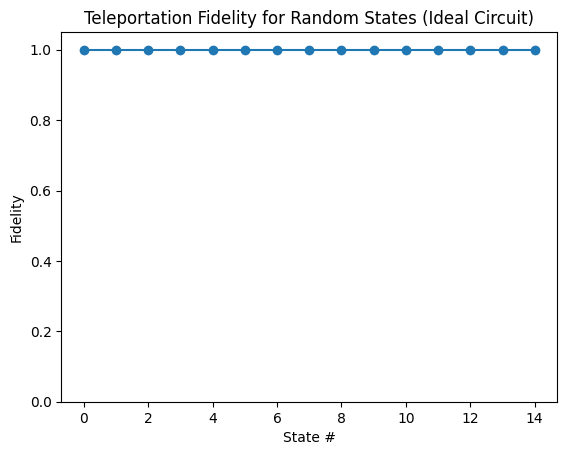

Average Fidelity = 0.9999999999999998


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace

def teleport_and_fidelity(theta, phi):
    # 1️⃣ Prepare teleportation circuit (ideal, no classical logic)
    qc = QuantumCircuit(3)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()
    qc.cx(1, 2)
    qc.cz(0, 2)

    # 2️⃣ Compute input and output statevectors
    psi_in_circ = QuantumCircuit(1)
    psi_in_circ.ry(theta, 0)
    psi_in_circ.rz(phi, 0)
    psi_in = Statevector.from_instruction(psi_in_circ)

    psi_out = Statevector.from_instruction(qc)

    # 3️⃣ Extract only the teleported qubit (qubit 2)
    rho_out = partial_trace(psi_out, [0, 1])  # trace out qubits 0 and 1

    # 4️⃣ Compute fidelity between input and teleported output
    return state_fidelity(psi_in, rho_out)

# 5️⃣ Run for random states
thetas = np.random.uniform(0, pi, 15)
phis   = np.random.uniform(0, 2*pi, 15)
fids = [teleport_and_fidelity(t, p) for t, p in zip(thetas, phis)]

# 6️⃣ Plot results
plt.plot(fids, "o-")
plt.title("Teleportation Fidelity for Random States (Ideal Circuit)")
plt.xlabel("State #")
plt.ylabel("Fidelity")
plt.ylim(0, 1.05)
plt.show()

print("Average Fidelity =", np.mean(fids))


# **Task 4 – Step-by-Step Bloch Visualization**

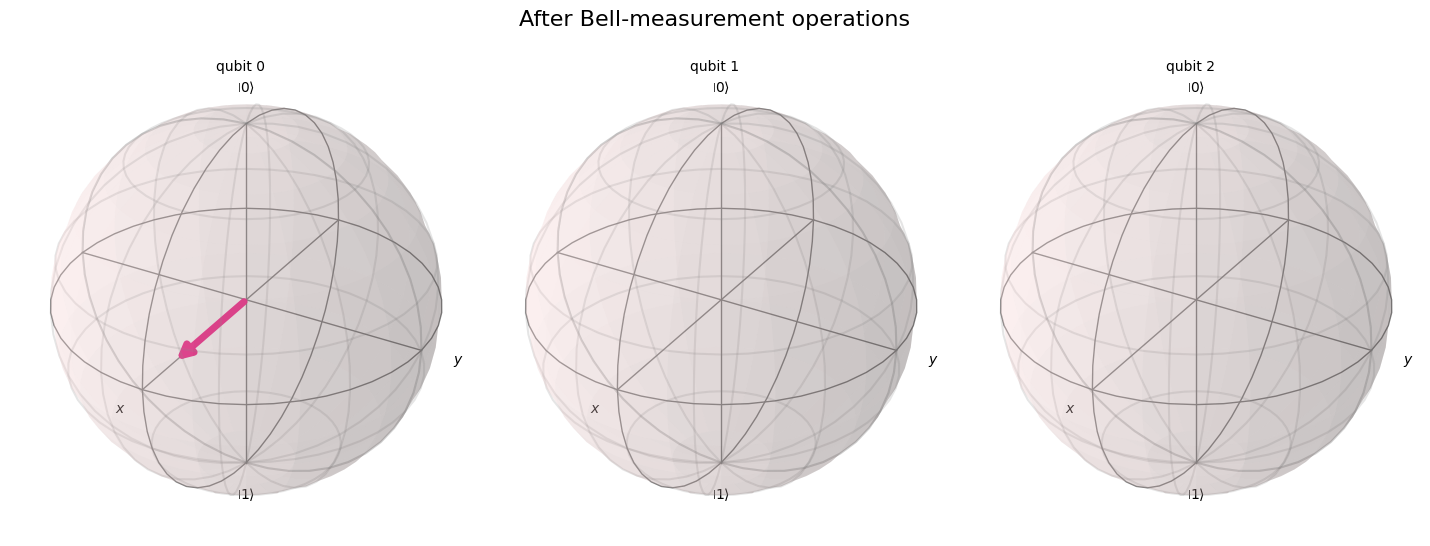

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from math import pi

qc = QuantumCircuit(3)
theta, phi = pi/4, pi/2

# Step 1 – Input state
qc.ry(theta, 0)
qc.rz(phi, 0)
plot_bloch_multivector(Statevector(qc), title="Initial state |ψ⟩ on qubit 0")

# Step 2 – Create Bell pair
qc.h(1)
qc.cx(1, 2)
plot_bloch_multivector(Statevector(qc), title="After creating Bell pair (1–2)")

# Step 3 – Bell-measurement stage
qc.cx(0, 1)
qc.h(0)
plot_bloch_multivector(Statevector(qc), title="After Bell-measurement operations")


## **Task 5 – Teleportation under Noise (using if_test syntax)**

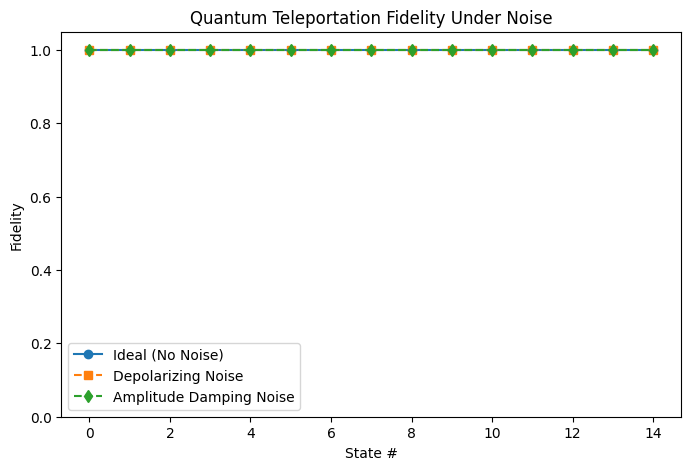

Average Fidelity (Ideal): 0.9999999999999999
Average Fidelity (Depolarizing): 0.9999999999999994
Average Fidelity (Amplitude Damping): 0.9999999999999994


In [18]:
# Install Qiskit Aer (if needed)
!pip install qiskit qiskit-aer -q

# --- Imports ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# --- Define teleportation function with noise ---
def teleport_and_fidelity_noisy(theta, phi, noise_model=None):
    qc = QuantumCircuit(3)

    # 1. Prepare input state on qubit 0
    qc.ry(theta, 0)
    qc.rz(phi, 0)

    # 2️. Create entanglement between qubit 1 and 2
    qc.h(1)
    qc.cx(1, 2)

    # 3️. Bell measurement
    qc.cx(0, 1)
    qc.h(0)

    # 4️. Correction operations
    qc.cx(1, 2)
    qc.cz(0, 2)

    # --- Run with simulator ---
    sim = AerSimulator(noise_model=noise_model)
    qc = transpile(qc, sim)
    result = sim.run(qc).result()

    # --- Compute fidelity ---
    psi_in_circ = QuantumCircuit(1)
    psi_in_circ.ry(theta, 0)
    psi_in_circ.rz(phi, 0)
    psi_in = Statevector.from_instruction(psi_in_circ)

    psi_out = Statevector.from_instruction(qc)
    rho_out = partial_trace(psi_out, [0, 1])

    return state_fidelity(psi_in, rho_out)

# --- Create noise models ---
depol_noise = NoiseModel()
amp_noise   = NoiseModel()

#  Depolarizing error: separate for 1q and 2q gates
depol_err_1q = depolarizing_error(0.02, 1)
depol_err_2q = depolarizing_error(0.02, 2)

depol_noise.add_all_qubit_quantum_error(depol_err_1q, ["x", "h"])
depol_noise.add_all_qubit_quantum_error(depol_err_2q, ["cx"])

#  Amplitude damping noise (applies only to 1-qubit gates)
amp_err = amplitude_damping_error(0.05)
amp_noise.add_all_qubit_quantum_error(amp_err, ["x", "h"])

# --- Run fidelity comparison ---
thetas = np.random.uniform(0, pi, 15)
phis   = np.random.uniform(0, 2*pi, 15)

fids_ideal = [teleport_and_fidelity_noisy(t, p) for t, p in zip(thetas, phis)]
fids_depol = [teleport_and_fidelity_noisy(t, p, depol_noise) for t, p in zip(thetas, phis)]
fids_amp   = [teleport_and_fidelity_noisy(t, p, amp_noise)   for t, p in zip(thetas, phis)]

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(fids_ideal, "o-", label="Ideal (No Noise)")
plt.plot(fids_depol, "s--", label="Depolarizing Noise")
plt.plot(fids_amp, "d--", label="Amplitude Damping Noise")
plt.xlabel("State #")
plt.ylabel("Fidelity")
plt.title("Quantum Teleportation Fidelity Under Noise")
plt.legend()
plt.ylim(0, 1.05)
plt.show()

print("Average Fidelity (Ideal):", np.mean(fids_ideal))
print("Average Fidelity (Depolarizing):", np.mean(fids_depol))
print("Average Fidelity (Amplitude Damping):", np.mean(fids_amp))
